In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
from functools import reduce
import matplotlib.pyplot as plt
from scipy import stats
import os

In [2]:
path = r"C:\Users\ncc333\Downloads\archive_Olist.zip"
extracted_file = 'data_files'


In [3]:
with ZipFile(path, "r") as f:
    f.extractall('data_files') #extracts all files in the path provided to a folder names 'data_files'

In [4]:
data_frames = {}

for file in os.listdir(extracted_file):
    if file.endswith('csv'):
        file_path = os.path.join(extracted_file, file) #joins the foldername and each filename into a file path
        data_frames[file] = pd.read_csv(file_path) #this fills the dictionary with filename as the key and the contents of the file as the value

In [5]:
for name, df in data_frames.items():
    print(f'{name}')


olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv


In [6]:
customers = pd.read_csv(r"data_files\olist_customers_dataset.csv") #saves the content of the csv file into the variable named customers
customers.head(2)

# print(customers.columns)
# print(customers.shape)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [7]:
geolocation = pd.read_csv(r"data_files\olist_geolocation_dataset.csv")
geolocation.head(2)
# print(geolocation.shape)
# print(geolocation.columns)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [8]:
order_items = pd.read_csv(r"data_files\olist_order_items_dataset.csv")
order_items.head(2)
# print(order_items.shape)
# print(order_items.columns)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [9]:
order_payment = pd.read_csv(r"data_files\olist_order_payments_dataset.csv")
order_payment.head(2)
# print(order_payment.columns)
# print(order_payment.shape)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [10]:
order_reviews = pd.read_csv(r"data_files\olist_order_reviews_dataset.csv")
order_reviews.head(2)
# print(order_reviews.columns)
# print(order_reviews.shape)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [11]:
order_data = pd.read_csv(r"data_files\olist_orders_dataset.csv")
order_data.head(2)
# print(order_data.columns)
# print(order_data.shape)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [12]:
product = pd.read_csv(r"data_files\olist_products_dataset.csv")
product.head(2)
# print(product.columns)
# print(product.shape)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [13]:
sellers = pd.read_csv(r"data_files\olist_sellers_dataset.csv")
sellers.head(2)
# print(order_reviews.columns)
# print(order_reviews.shape)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [14]:
product_category = pd.read_csv(r"data_files\product_category_name_translation.csv")
product_category.head(2)
# print(product_category.columns)
# print(product_category.shape)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [15]:
for name, df in data_frames.items():
    print(f"{name}: {list(df.columns)}") # prints the filename with a list of the columns

olist_customers_dataset.csv: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
olist_geolocation_dataset.csv: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']
olist_orders_dataset.csv: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
olist_order_items_dataset.csv: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
olist_order_payments_dataset.csv: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
olist_order_reviews_dataset.csv: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
olist_products_dataset.csv: ['product_id', 'product_category_name', 'pro

In [16]:
#Get sets of columns for each file
columns_per_file = {name: set(df.columns) for name, df in data_frames.items()}
columns_per_file

#Intersection (columns appear in every file)
common_cols = reduce(set.intersection, columns_per_file.values())
print(f"Common columns across all CSVs: {common_cols}")

Common columns across all CSVs: set()


### Merging Datasets

In [17]:
order_data.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [18]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [19]:
# Customers + Order
orders_customers = pd.merge(order_data, customers, on="customer_id", how="inner")
orders_customers.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA


In [20]:
#2 Order + Payments
#this adds payments dataset to the already merged order_customer
orders_payments= pd.merge(orders_customers, order_payment, on="order_id", how="left")
orders_payments.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00


In [21]:
#3. Orders + Reviews
orders_reviews = pd.merge(orders_payments, order_reviews, on="order_id", how="left")
orders_reviews.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48


In [22]:
orders_reviews.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  176
order_delivered_carrier_date      1898
order_delivered_customer_date     3154
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
payment_sequential                   1
payment_type                         1
payment_installments                 1
payment_value                        1
review_id                          800
review_score                       800
review_comment_title             92482
review_comment_message           61662
review_creation_date               800
review_answer_timestamp            800
dtype: int64

In [23]:
#4. Order + Order Items
orders_items = pd.merge(orders_reviews, order_items, on= "order_id", how="left")
orders_items.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72


In [24]:
orders_items.columns.nunique()

28

In [25]:
# 5. Order Item + Products
orders_products = pd.merge(orders_items, product, on="product_id", how="left")
orders_products.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0


In [26]:
orders_products.columns.nunique()

36

In [27]:
#6. Products + Product Category Translation
orders_products = pd.merge(
    orders_products, product_category, on="product_category_name",  how="left"
)
orders_products.head(2)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [28]:
orders_products.columns.nunique()

37

In [29]:
#7. Order Items + Sellers
orders_sellers = pd.merge(orders_products, sellers, on="seller_id", how="left")
orders_sellers.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP


In [30]:
#8. Customers + Geolocation (via zip prefix)
#Note: many geolocations per ZIP, so we take first occurrence per prefix
geo_unique = geolocation.groupby("geolocation_zip_code_prefix").first().reset_index()

final_df = pd.merge(
    orders_sellers, geo_unique, left_on="customer_zip_code_prefix", right_on= "geolocation_zip_code_prefix",
    how="left"
)
print(final_df.shape)
final_df.head()

(119143, 45)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350.0,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350.0,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,housewares,9350.0,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,19.0,perfumery,31570.0,belo horizonte,SP,47813.0,-12.169860,-44.988369,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,21.0,auto,14840.0,guariba,SP,75265.0,-16.746337,-48.514624,vianopolis,GO


## **PROBABILITY**

#### Probability of an Event

Question: What is the probbability that a randomly chosen order recieved a 5-star review

In [31]:
#Probability of a 5-star review
total_reviews = len(orders_reviews)
favourable = (orders_reviews["review_score"]==5).sum()
prob_5star = favourable/total_reviews

print(f"Probability of 5 stars = {round(prob_5star*100,2)}%")

Probability of 5 stars = 57.26%


Interpretation
Approximately 57% of customers give 5 stars

#### Complementary Probability

In [32]:
#What is the probability of not getting a 5-star review?

p_not5 = (orders_reviews["review_score"] !=5).sum()/len(orders_reviews)
print(f"P(Review  )")
print(f"P(Review ≠ 5 stars) = {round(p_not5 *100, 2)}%")

P(Review  )
P(Review ≠ 5 stars) = 42.74%


Approximately 42% of reviews are less than perfect. This highlights that not everyone is fully satisfied wtih product purchased

#### Joint Probability

Concept: P(A∩B)

Question: What is the probability that an order was paid by credit card and received a 5-star review?

In [33]:
orders_reviews.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

In [34]:
total_orders = len(orders_reviews)
favourable_joint =((orders_reviews['payment_type']=="credit_card") & 
                   (orders_reviews["review_score"]==5)).sum()
p_joint = favourable_joint/total_orders

print(f"P(Credit Card ∩ 5 stars) = {round(p_joint *100,2)}%")


P(Credit Card ∩ 5 stars) = 42.43%


**Interpretation**<br>
Approximately 42% of all orders are paid for by credit card and get a perfect review

#### Conditional Probability

Concept:<br>
`𝑃(𝐴∣𝐵)=𝑃(𝐴∩𝐵)/𝑃(𝐵)` 
                
`𝑃(𝐴∣𝐵)= Favourable_outcomes / Total_credit_card_outcomes`<br>
Question: What is the probability that a review is 5 stars given that the payment was made by credit card?

In [35]:
# If we already know the payment method was credit card, what is the probability that the review is 5 stars?
# This measures satisfaction among credit card users only.

#𝑃(5∣credit_card)
#P(5∣voucher)
#P(5∣boleto)
# Each is a separate conditional distribution. They are not mutually exclusive outcomes of the same experiment.

#this is checking for the probability of getting a 5 star review amongst credit card users, so the total poplation will be the number of credit card users
favourable_cond = ((orders_reviews["payment_type"]=="credit_card") &
                   (orders_reviews["review_score"]==5)).sum()

total_credit = (orders_reviews["payment_type"]=="credit_card").sum()

p_cond = favourable_cond/total_credit
print(f"P(5 stars|Credit Card) = {round(p_cond *100,2)}%")

# this checks the probability of getting a 5 star review amongst voucher users
favourable_cond = ((orders_reviews["payment_type"]=="voucher")&
                   (orders_reviews["review_score"]==5)).sum()
total_credit = (orders_reviews["payment_type"]=="voucher").sum()

p_cond = favourable_cond/total_credit
print(f"P(5 stars|Voucher) = {round(p_cond *100,2)}%")

# this checks the probability of getting a 5 star review amongst boleto users
favourable_cond = ((orders_reviews["payment_type"]=="boleto")&
                   (orders_reviews["review_score"]==5)).sum()
total_credit = (orders_reviews["payment_type"]=="boleto").sum()

p_cond = favourable_cond/total_credit
print(f"P(5 stars|Boleto) = {round(p_cond *100,2)}%")

P(5 stars|Credit Card) = 57.43%
P(5 stars|Voucher) = 55.3%
P(5 stars|Boleto) = 56.95%


**Interpretation**<br>
Each one is around 55-57% meaning in every payment method, about half of the customers gave 5 stars

#### Baye's Rule

Concept:

`P(A∣B )= P(B∣A)⋅P(A) / P(B)`

A = payment

B = review =5

`P(payment | review=5) = P(review=5 | payment).p(payment) / p(review =5)`


Question: Given that an order received a 5-star review, what is the probability that it was paid with each payment method (credit_card, boleto, voucher)?


Among only the 5-star reviews, how are payment methods distributed?

In [36]:
# Among orders that got a 5-star review, what fraction used each payment method (credit_card, boleto, voucher, etc.)?
# That is, if we look at only 5-star reviews,  how are they split across payment types?

#Total number of 5-star reviews (denominator for all)
total_5star = (orders_reviews["review_score"]==5).sum()

# ---- P(payment = credit_card | review = 5) ----
favourable_cond = ((orders_reviews["payment_type"]=="credit_card")&
                   (orders_reviews["review_score"]==5)).sum()
p_cond = favourable_cond/total_5star
print(f"P(Credit Card | 5 stars) = {round(p_cond*100,2)}%")

# ---- P(payment = voucher | review = 5) ----
favourable_cond = ((orders_reviews["payment_type"]=="voucher")&
                   (orders_reviews["review_score"]==5)).sum()
p_cond = favourable_cond/total_5star
print(f"P(Voucher | 5 stars) = {round(p_cond*100,2)}%")

# ---- P(payment = boleto | review = 5) ----
favourable_cond = ((orders_reviews["payment_type"]=="boleto")&
                   (orders_reviews["review_score"]==5)).sum()
p_cond = favourable_cond/total_5star
print(f"P(Boleto | 5 stars) = {round(p_cond*100,2)}%")



P(Credit Card | 5 stars) = 74.11%
P(Voucher | 5 stars) = 5.39%
P(Boleto | 5 stars) = 18.95%


In [68]:
orders_reviews["payment_type"].value_counts()

payment_type
credit_card    77198
boleto         19910
voucher         5830
debit_card      1536
not_defined        3
Name: count, dtype: int64

In [84]:

#Total number of 5-star reviews (denominator for all)
total_5star = (orders_reviews["review_score"]==5).sum()

# ---- P(payment = credit_card | review = 5) ----
favourable_cond = ((orders_reviews["payment_type"]=="credit_card")&
                   (orders_reviews["review_score"]==5)).sum()
credit_cond = favourable_cond/total_5star
print(f"P(Credit Card | 5 stars) = {round(credit_cond*100,2)}%")

# ---- P(payment = voucher | review = 5) ----
favourable_cond = ((orders_reviews["payment_type"]=="voucher")&
                   (orders_reviews["review_score"]==5)).sum()
voucher_cond = favourable_cond/total_5star
print(f"P(Voucher | 5 stars) = {round(voucher_cond*100,2)}%")

# ---- P(payment = boleto | review = 5) ----
favourable_cond = ((orders_reviews["payment_type"]=="boleto")&
                   (orders_reviews["review_score"]==5)).sum()
boleto_cond = favourable_cond/total_5star
print(f"P(Boleto | 5 stars) = {round(boleto_cond*100,2)}%")

# ---- P(payment = debit_card | review = 5) ----
favourable_cond = ((orders_reviews["payment_type"]=="debit_card")&
                   (orders_reviews["review_score"]==5)).sum()
debit_cond = favourable_cond/total_5star
print(f"P(Debit card | 5 stars) = {round(debit_cond*100,2)}%")

# ---- P(payment = not_defined | review = 5) ----
favourable_cond = ((orders_reviews["payment_type"]=="not_defined")&
                   (orders_reviews["review_score"]==5)).sum()
undefined_cond = favourable_cond/total_5star
print(f"P(Not defined| 5 stars) = {round(undefined_cond*100,2)}%")

print(round((credit_cond + voucher_cond + boleto_cond + debit_cond + undefined_cond)*100,2),"%")


P(Credit Card | 5 stars) = 74.11%
P(Voucher | 5 stars) = 5.39%
P(Boleto | 5 stars) = 18.95%
P(Debit card | 5 stars) = 1.55%
P(Not defined| 5 stars) = 0.0%
100.0 %


**Interpretation**<br>
Among all 5 star reviews, what fraction used credit card?<br><br>
Credit card - 74.11% of 5 star reviews used credit card<br>
Voucher - 5.39% of 5 star reviews used voucher<br>
Bolero - 18.59% of 5 star reviews used Boleto<br><br>
Unlike P(5 | payment)- conditional probability , these will sum to approximately 100% across all payment methods, because every 5-star order must fall into exactly one payment category.

### Expectation and Variance

**Question1**<br>
What is the average delivery time(expectation) and variance (spread/consistency) of deliveries?

In [37]:
orders_reviews.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


In [38]:
#Converting the datetime columns to pandas datetime

#Converting to datetime
orders_reviews["order_purchase_timestamp"] = pd.to_datetime(orders_reviews["order_purchase_timestamp"])
orders_reviews["order_delivered_customer_date"] = pd.to_datetime(orders_reviews["order_delivered_customer_date"])

#Calculating delivery time in days
orders_reviews["delivery_time_days"] = (orders_reviews["order_delivered_customer_date"] - orders_reviews["order_purchase_timestamp"]).dt.days

#Dropping missing values
delivery_times = orders_reviews["delivery_time_days"].dropna()

#Getting the expectation
mean_delivery = delivery_times.mean()

#Getting Varinace & standard deviation
variance_delivery = delivery_times.var()
std_delivery = delivery_times.std()

print(f"Expected delivery time (Mean): {round(mean_delivery,2)} days")
print(f"Variance of delivery time: {round(variance_delivery,2)} days")
print(f"Standard Deviation of delivery time: {round(std_delivery,2)} days")

Expected delivery time (Mean): 12.11 days
Variance of delivery time: 91.23 days
Standard Deviation of delivery time: 9.55 days


**Interpretation**<br>
A customer is estimated to recieve their package within approximately 3 days and 22 days, this shows that the delivery company is currently unreliable

**Question 2**<br>
What is the expected customer reviews score and how much do reviews vary?

In [39]:
#Expectation
mean_review = orders_reviews["review_score"].mean()

variance_review =orders_reviews["review_score"].var()
std_review = orders_reviews["review_score"].std()

print(f"Expected review score (Mean): {round(mean_review, 2)}")
print(f"Variance of review score: {round(variance_review, 2)}")
print(f"Standard deviation of review score: {round(variance_review, 2)}")

Expected review score (Mean): 4.08
Variance of review score: 1.82
Standard deviation of review score: 1.82


**Interpretation**<br>
The mean review score show the overall satisfaction (e.g ~4 stars = mostly happy customer). The std tells us that most customers give between 3 and 5 stars. If Std was very high (e.g 2), it would mean customers are divided (some give 1, others give 5). But the service reputation here is fairly consistent.


### Sampling and Estimation

Random sampling means selecting a subset of the data without bias so that it fairly represents the whole population.

In [40]:
orders_reviews.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,8.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,8.0


In [44]:
#Population mean (true mean from the entire dataset)
pop_mean_payment = orders_reviews["payment_value"].mean()

sample_50 = orders_reviews["payment_value"].sample(50, random_state=42) #When you set a random_state, the sequence of "random" numbers generated will be the same every time you run the code. 
sample_mean_50 = sample_50.mean()

sample_200 = orders_reviews["payment_value"].sample(200, random_state=42)
sample_mean_200 = sample_200.mean()

print(f"Population mean payment value: {round(pop_mean_payment, 2)}")
print(f"Sample mean (n=50): {round(sample_mean_50, 2)}")
print(f"Sample mean (n=2000): {round(sample_mean_200, 2)}")

Population mean payment value: 153.92
Sample mean (n=50): 122.0
Sample mean (n=2000): 155.38


**Interpretation**<br><br>
population mean = teh real average spending across all customers.<br>
sample mean (50 orders) may be off (underestimate or overestimate)<br>
sample mean (200 orders) should be closer to the population mean<br>

This shows that random sampling is useful in getting a good estimate of the population without looking at every order.

### Law of Large Numbers (LLN)

The law of large numbers says:<br>
"As the sample size increases, the sample mean converges to the true population mean"

In [45]:
# Draw increasing sample sizes and track their means
sample_sizes = [10, 50, 100, 500, 1000, 5000]
sample_means = []

for n in sample_sizes:
    sample = orders_reviews["payment_value"].sample(n, random_state=234)
    sample_means.append(sample.mean())

# Show results
for n, mean in zip(sample_sizes, sample_means):
    print(f"Sample size = {n}, Sample mean = {round(mean,2)}")

print(f"Population mean (true): {round(pop_mean_payment, 2)}")

Sample size = 10, Sample mean = 104.02
Sample size = 50, Sample mean = 139.52
Sample size = 100, Sample mean = 154.37
Sample size = 500, Sample mean = 149.92
Sample size = 1000, Sample mean = 152.71
Sample size = 5000, Sample mean = 155.77
Population mean (true): 153.92


**Interpretation**<br>
The smaller the sample size, the less unreliable the mean is. With 10 samples, the mean may jump around (unreliable), but with 1000+ samples, the mean is almost the same as the population mean.

### **Central Limit Theorem (CLT)**

In [46]:
orders_reviews.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,8.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,8.0


In [47]:
orders_reviews.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'delivery_time_days'],
      dtype='object')

Sample Mean: 4.094622146509806
Population mean: 4.083855784255097


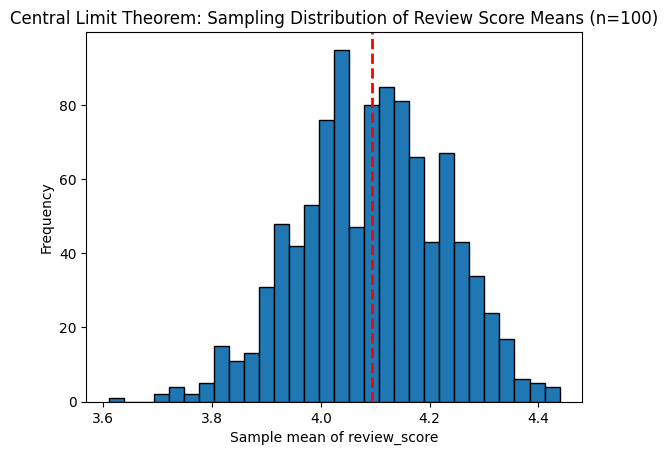

In [ ]:
# lets collect 100 samples of review_scores, take the mean. Repeat the same process a thousand times.
# Then take all the 1000 means use it to plot a histogram and lets see what the shape or distribution would look like.

#Collecting many sample means
sample_means = []
for i in range(1000):
    sample = orders_reviews["review_score"].sample(100, replace=True) #replace=True allows each item to be selected multiple times in the sample, replace=False each item can only be selected once
    sample_means.append(sample.mean())
    
print(f"Sample Mean: {np.mean(sample_means)}")
print(f"Population mean: {np.mean(orders_reviews["review_score"])}")

#Plotting the sampling distribution of the mean
plt.hist(sample_means, bins=30, edgecolor= "black")
plt.axvline(np.mean(sample_means), color="red", linestyle="dashed", linewidth=2)
plt.title("Central Limit Theorem: Sampling Distribution of Review Score Means (n=100)")
plt.xlabel("Sample mean of review_score")
plt.ylabel('Frequency')
plt.show()


**The Central Limit Theorem says**, *"If we take many random samples and calculate their means the distribution of those means will look like a normal distribution (bell curve), even if the original data is not normal."*

### **One Sample Test**

`H₀ (Null Hypothesis)- Says the sample mean is equal to the reference value`

`H₁ (Alternative Hypothesis) - Says the sample mean is different from the reference value.`

In our Olist data, the review_score ranges from 1–5. Neutral is 3. We want to test, “Is the average review score different from 3?”<br><br>
**Step 1 – Set up hypotheses**

`H₀: Average review score = 3 (customers are neutral)`

`H₁: Average review score ≠ 3 (customers are not neutral, they are either happier or unhappier)`

**Step 2 – Why test it?**

- If H₀ is true, Olist has “just okay” service.

- If H₁ is true, Customers are clearly happy (if mean > 3) or unhappy (if mean < 3).

**Question1**

In the Olist e-commerce dataset, customer reviews are scored from 1 (worst) to 5 (best). A score of 3 is considered neutral.
Using the review data, test whether the average customer review score is significantly different from 3 (neutral)

In [83]:
# We have one sample, that is the set of all customer review scores.

#We are comparing its mean against a benchmark/reference value = 3.

# Now, the question is essentially, "Are Olist customers, on average, happier than neutral (3)?"

# Lets write the hypothesis

# H₀ (Null Hypothesis): The average review score is equal to 3
# H₁ (Alternative Hypothesis): The average review score is not equal to 3

#Extracting the review scors
review_scores = order_reviews["review_score"].dropna()

#Defining the neutral benchmark
neutral_score = 3

#Perfomring one sample t-test
t_stat, p_value = stats.ttest_1samp(review_scores, popmean=neutral_score) #popmean represents the expected value in null hypothesis

print(f"Mean review score: {round(review_scores.mean(), 2)}")
print(f'T-statistic: {round(t_stat, 3)}')
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject Ho: The average review score is significantly different from 3 (neutral).")
else:
    print("Fail to reject Ho: The data does not provide enough evidence that the average review differs from 3.")

Mean review score: 4.09
T-statistic: 253.952
P-value: 0.0
Reject Ho: The average review score is significantly different from 3 (neutral).


**Interpretation**
The p-value is ~0, way below 0.05 (strong evidence)
So we can conclude that the customer is significantly happier than neutral or sadder than neutral

### **Two Sample Test**

A two sample t-test is a statistical test used to compare the average (mean) of two independent groups to see if they are significantly different from each other. It answers the question, "Do two groups have the same average, or are their averages different?"<br><br>
H₀ (Null Hypothesis)- The two group means are equal.<br>
H₁ (Alternative Hypothesis)- The two group means are not equal.